# Aprendizaje Automático

# Trabajo Práctico N°1

## Integrantes: Pozzo Micaela, Vercesi Patricio

## Exploración de datos

### Importación

#### Librerías

In [ ]:
!pip install pandas -q
!pip install seaborn -q

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import matplotlib.dates as mdates

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler, RandomUnderSampler

#### Dataset

**Comentar dependiendo de donde se saca el dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # desde el Drive
#files.upload()                # desde la PC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas:
# temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
file_path = 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

### Vista general de los datos

In [ ]:
df

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [ ]:
df.sort_values(by=['Date', 'Location'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# Filtrado de lugares que son de interés
locations = ["Sydney", "SydneyAirport", "Canberra", "Melbourne", "MelbourneAirport"]
df = df[df['Location'].isin(locations)]
df.reset_index(drop=True, inplace=True)

In [ ]:
df = df.drop(columns=["Location"])

In [ ]:
# Pasamos al tipo date
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


### Variables categóricas y su codificación

In [ ]:
print(df.select_dtypes(exclude=['float', 'int']).columns)

Index(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [ ]:
## Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15986 entries, 0 to 15985
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              15986 non-null  datetime64[ns]
 1   MinTemp           15495 non-null  float64       
 2   MaxTemp           15500 non-null  float64       
 3   Rainfall          15199 non-null  float64       
 4   Evaporation       14280 non-null  float64       
 5   Sunshine          14038 non-null  float64       
 6   WindGustDir       14529 non-null  object        
 7   WindGustSpeed     14531 non-null  float64       
 8   WindDir9am        15291 non-null  object        
 9   WindDir3pm        15696 non-null  object        
 10  WindSpeed9am      15725 non-null  float64       
 11  WindSpeed3pm      15737 non-null  float64       
 12  Humidity9am       15416 non-null  float64       
 13  Humidity3pm       15461 non-null  float64       
 14  Pressure9am       1525

#### Fecha

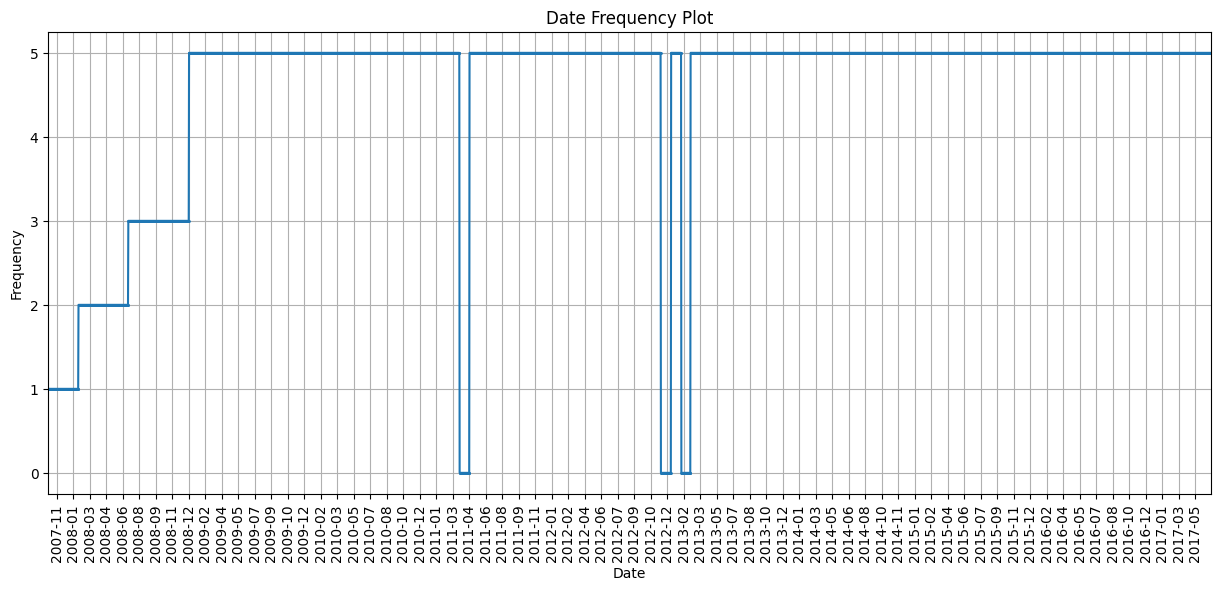

In [ ]:
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())
date_frequency = df.Date
date_frequency = df.groupby('Date').size().reindex(date_range, fill_value=0).reset_index(name='Frequency')
date_frequency = date_frequency.rename(columns={'index': 'Date'})

# Plot the date frequency
plt.figure(figsize=(15, 6))
plt.plot(date_frequency['Date'], date_frequency['Frequency'], marker='o', markersize = 1)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Date Frequency Plot')
plt.xlim(date_frequency['Date'].min(), date_frequency['Date'].max())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Set the interval between ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels

plt.xticks(rotation=90)
plt.grid()
plt.show()


##### Codificación

Columna del número de día

In [ ]:
#Creamos columna de los días desde el comienzo de los datos
reference_date = df['Date'][0]
df['DayNumber'] = (df['Date'] - reference_date).dt.days

Columnas del día del año codificadas trigonométricamente

In [ ]:
def add_trig_date_data(df):
    # Para una mayor interpretabilidad, rotamos el calendario dejando la mitad del verano en los -90°
    day_of_midsummer = 30 + 15 - 10 # mes + medio mes - 10 días del final de diciembre

    rotated_angle_of_the_year = (df.Date.dt.day_of_year - day_of_midsummer) * 2 * np.pi / 365.25

    df['Autumness'] = (np.sin(rotated_angle_of_the_year) + 1) / 2
    df['Summerness'] = (np.cos(rotated_angle_of_the_year) + 1) / 2

In [ ]:
add_trig_date_data(df)

In [ ]:
df[["Date", "Summerness", "Autumness"]]

,Date,Summerness,Autumness
0,2007-11-01,0.466159,1.146554e-03
1,2007-11-02,0.474745,6.382380e-04
2,2007-11-03,0.483338,2.776915e-04
3,2007-11-04,0.491937,6.502082e-05
4,2007-11-05,0.500538,2.889877e-07
...,...,...,...
15981,2017-06-24,0.128500,8.346452e-01
15982,2017-06-24,0.128500,8.346452e-01
15983,2017-06-24,0.128500,8.346452e-01
15984,2017-06-24,0.128500,8.346452e-01


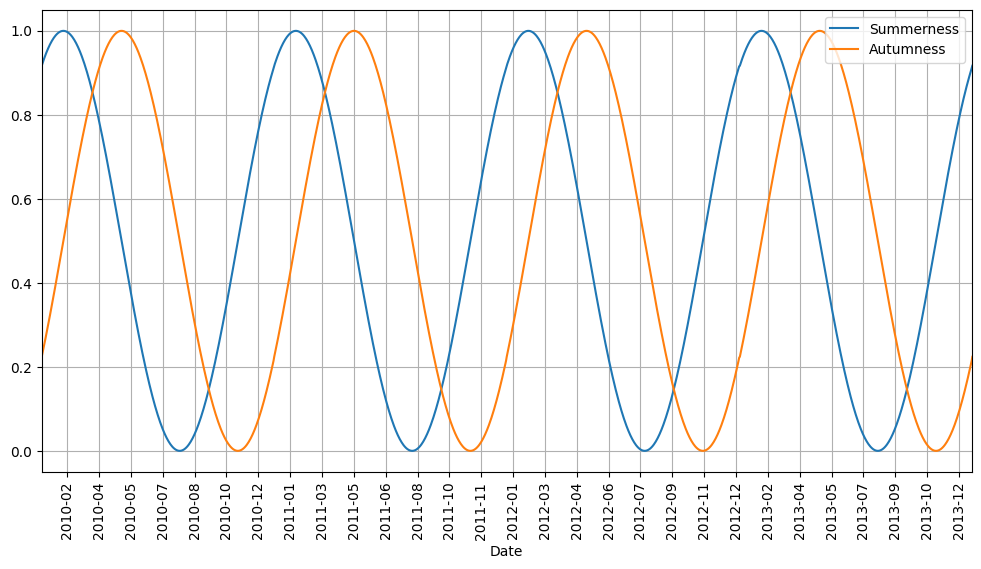

In [ ]:
add_trig_date_data(date_frequency)

# Plot the date frequency
plt.figure(figsize=(12, 6))
plt.plot(date_frequency['Date'], date_frequency['Summerness'], label = 'Summerness')
plt.plot(date_frequency['Date'], date_frequency['Autumness'], label = 'Autumness')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2010-01-01'), pd.to_datetime('2013-12-31'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Set the interval between ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels
plt.xticks(rotation=90)
plt.legend()  # Add a legend to distinguish the lines
plt.grid()
plt.show()

In [ ]:
df[["Date", "Summerness", "Autumness"]][df['Date'] == '2010-03-21']

,Date,Summerness,Autumness
3166,2010-03-21,0.857522,0.84954
3167,2010-03-21,0.857522,0.84954
3168,2010-03-21,0.857522,0.84954
3169,2010-03-21,0.857522,0.84954
3170,2010-03-21,0.857522,0.84954


Como vemos, en el límite entre dos estaciones ambos valores dan altos

#### Viento

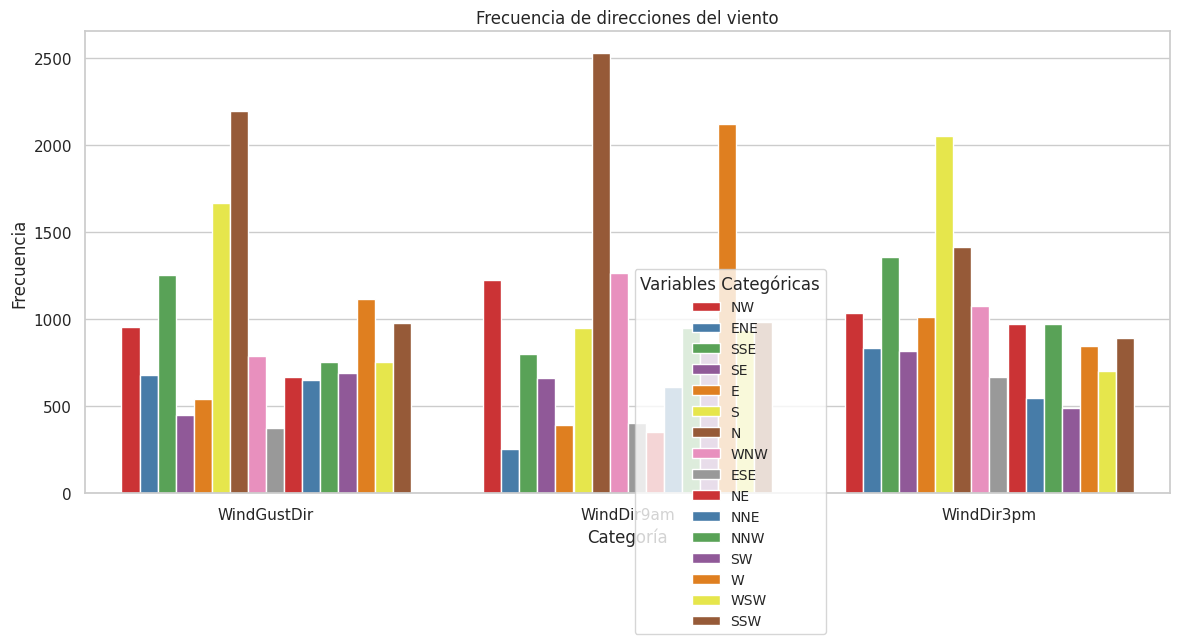

In [ ]:
categorias =  ['WindGustDir', 'WindDir9am', 'WindDir3pm']

plt.figure(figsize=(14, 6))  # Ajustar el ancho del gráfico
sns.set(style="whitegrid")  # Establecer el estilo de las barras agrupadas
sns.countplot(data=df.melt(value_vars=categorias), x='variable', hue='value', palette='Set1', order=categorias)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de direcciones del viento')

# Establecer la ubicación de la referencia en la esquina superior izquierda
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small')

# Ajustar la orientación de las leyendas
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small', bbox_to_anchor=(0.5, 0.5), ncol=1)

plt.show()


##### Codificación

In [ ]:
dir2ang = {
    'E': 0,
    'ESE': 22.5,
    'SE': 45,
    'SSE': 67.5,
    'S': 90,
    'SSW': 112.5,
    'SW': 135,
    'WSW': 157.5,
    'W': 180,
    'WNW': 202.5,
    'NW': 225,
    'NNW': 247.5,
    'N': 270,
    'NNE': 292.5,
    'NE': 315,
    'ENE': 337.5
}

def ds2velxy(dire, speed):
    if pd.isna(dire) or pd.isna(speed):
        return np.nan, np.nan

    angle = dir2ang[dire]
    sin = np.sin(np.radians(angle))
    cos = np.cos(np.radians(angle))
    vely = sin * speed
    velx = cos * speed
    return velx, vely

# Create new columns for sine and cosine of wind direction angles
#9am
aux = df.apply(lambda row: ds2velxy(row['WindDir9am'], row['WindSpeed9am']), axis=1)
df[['Wind9amVelX', 'Wind9amVelY']] = pd.Series(zip(*aux))

#3pm
aux = df.apply(lambda row: ds2velxy(row['WindDir3pm'], row['WindSpeed3pm']), axis=1)
df[['Wind3pmVelX', 'Wind3pmVelY']] = pd.Series(zip(*aux))

#gust
aux = df.apply(lambda row: ds2velxy(row['WindGustDir'], row['WindGustSpeed']), axis=1)
df[['WindGustVelX', 'WindGustVelY']] = pd.Series(zip(*aux))

In [ ]:
df[["WindDir9am", 'WindSpeed9am', "Wind9amVelX", "Wind9amVelY"]]

,WindDir9am,WindSpeed9am,Wind9amVelX,Wind9amVelY
0,SW,6.0,-4.242641e+00,4.242641e+00
1,E,4.0,4.000000e+00,0.000000e+00
2,N,6.0,-1.102182e-15,-6.000000e+00
3,WNW,30.0,-2.771639e+01,-1.148050e+01
4,SSE,20.0,7.653669e+00,1.847759e+01
...,...,...,...,...
15981,N,20.0,-3.673940e-15,-2.000000e+01
15982,WNW,11.0,-1.016267e+01,-4.209518e+00
15983,W,17.0,-1.700000e+01,2.081900e-15
15984,W,17.0,-1.700000e+01,2.081900e-15


#### Lluvia o no lluvia

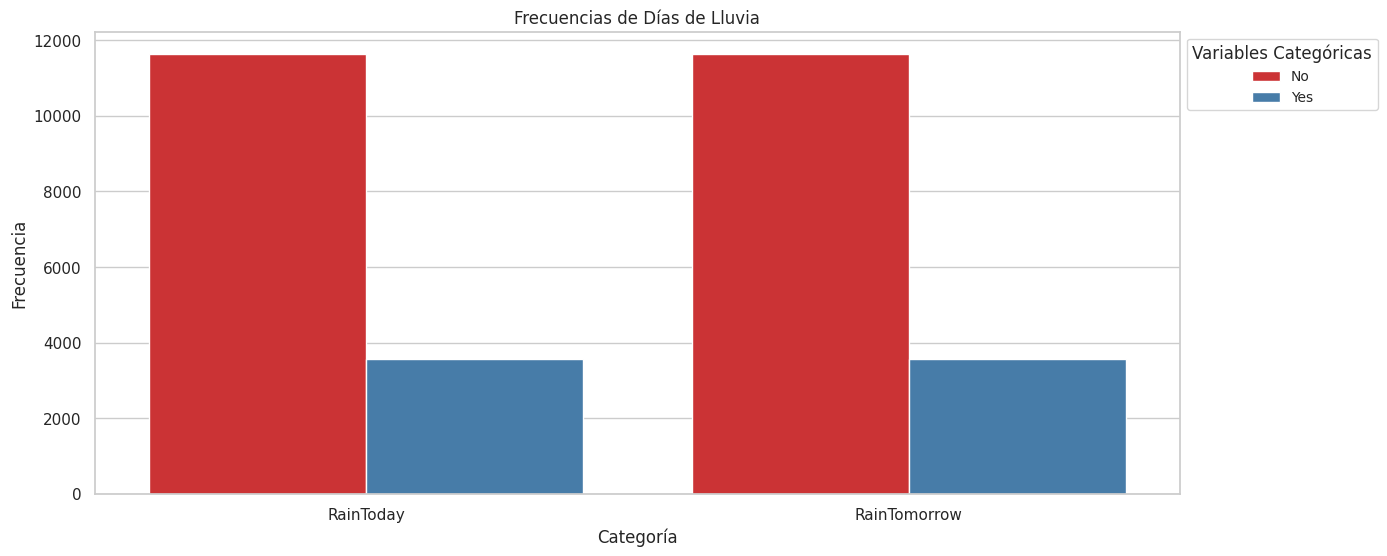

In [ ]:
categorias =  ['RainToday', 'RainTomorrow']

plt.figure(figsize=(14, 6))  # Ajustar el ancho del gráfico
sns.set(style="whitegrid")  # Establecer el estilo de las barras agrupadas
sns.countplot(data=df.melt(value_vars=categorias), x='variable', hue='value', palette='Set1', order=categorias)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Días de Lluvia')

# Establecer la ubicación de la referencia en la esquina superior izquierda
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small')

# Ajustar la orientación de las leyendas
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small', bbox_to_anchor=(1, 1), ncol=1)

plt.show()

Se ve claramente que el dataset no está balanceado en positivos y negativos

In [ ]:
df.RainToday = df.RainToday.replace({'No': 0, 'Yes': 1})
df.RainTomorrow = df.RainTomorrow.replace({'No': 0, 'Yes': 1})

#### Dataframe final

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15986 entries, 0 to 15985
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              15986 non-null  datetime64[ns]
 1   MinTemp           15495 non-null  float64       
 2   MaxTemp           15500 non-null  float64       
 3   Rainfall          15199 non-null  float64       
 4   Evaporation       14280 non-null  float64       
 5   Sunshine          14038 non-null  float64       
 6   WindGustDir       14529 non-null  object        
 7   WindGustSpeed     14531 non-null  float64       
 8   WindDir9am        15291 non-null  object        
 9   WindDir3pm        15696 non-null  object        
 10  WindSpeed9am      15725 non-null  float64       
 11  WindSpeed3pm      15737 non-null  float64       
 12  Humidity9am       15416 non-null  float64       
 13  Humidity3pm       15461 non-null  float64       
 14  Pressure9am       1525

### Analizando los valores atípicos.
### Outliers

<ipython-input-28-bbc67f866c59>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  numerical_columns = df.select_dtypes(include=[pd.np.number]).columns


<Figure size 2200x1500 with 0 Axes>

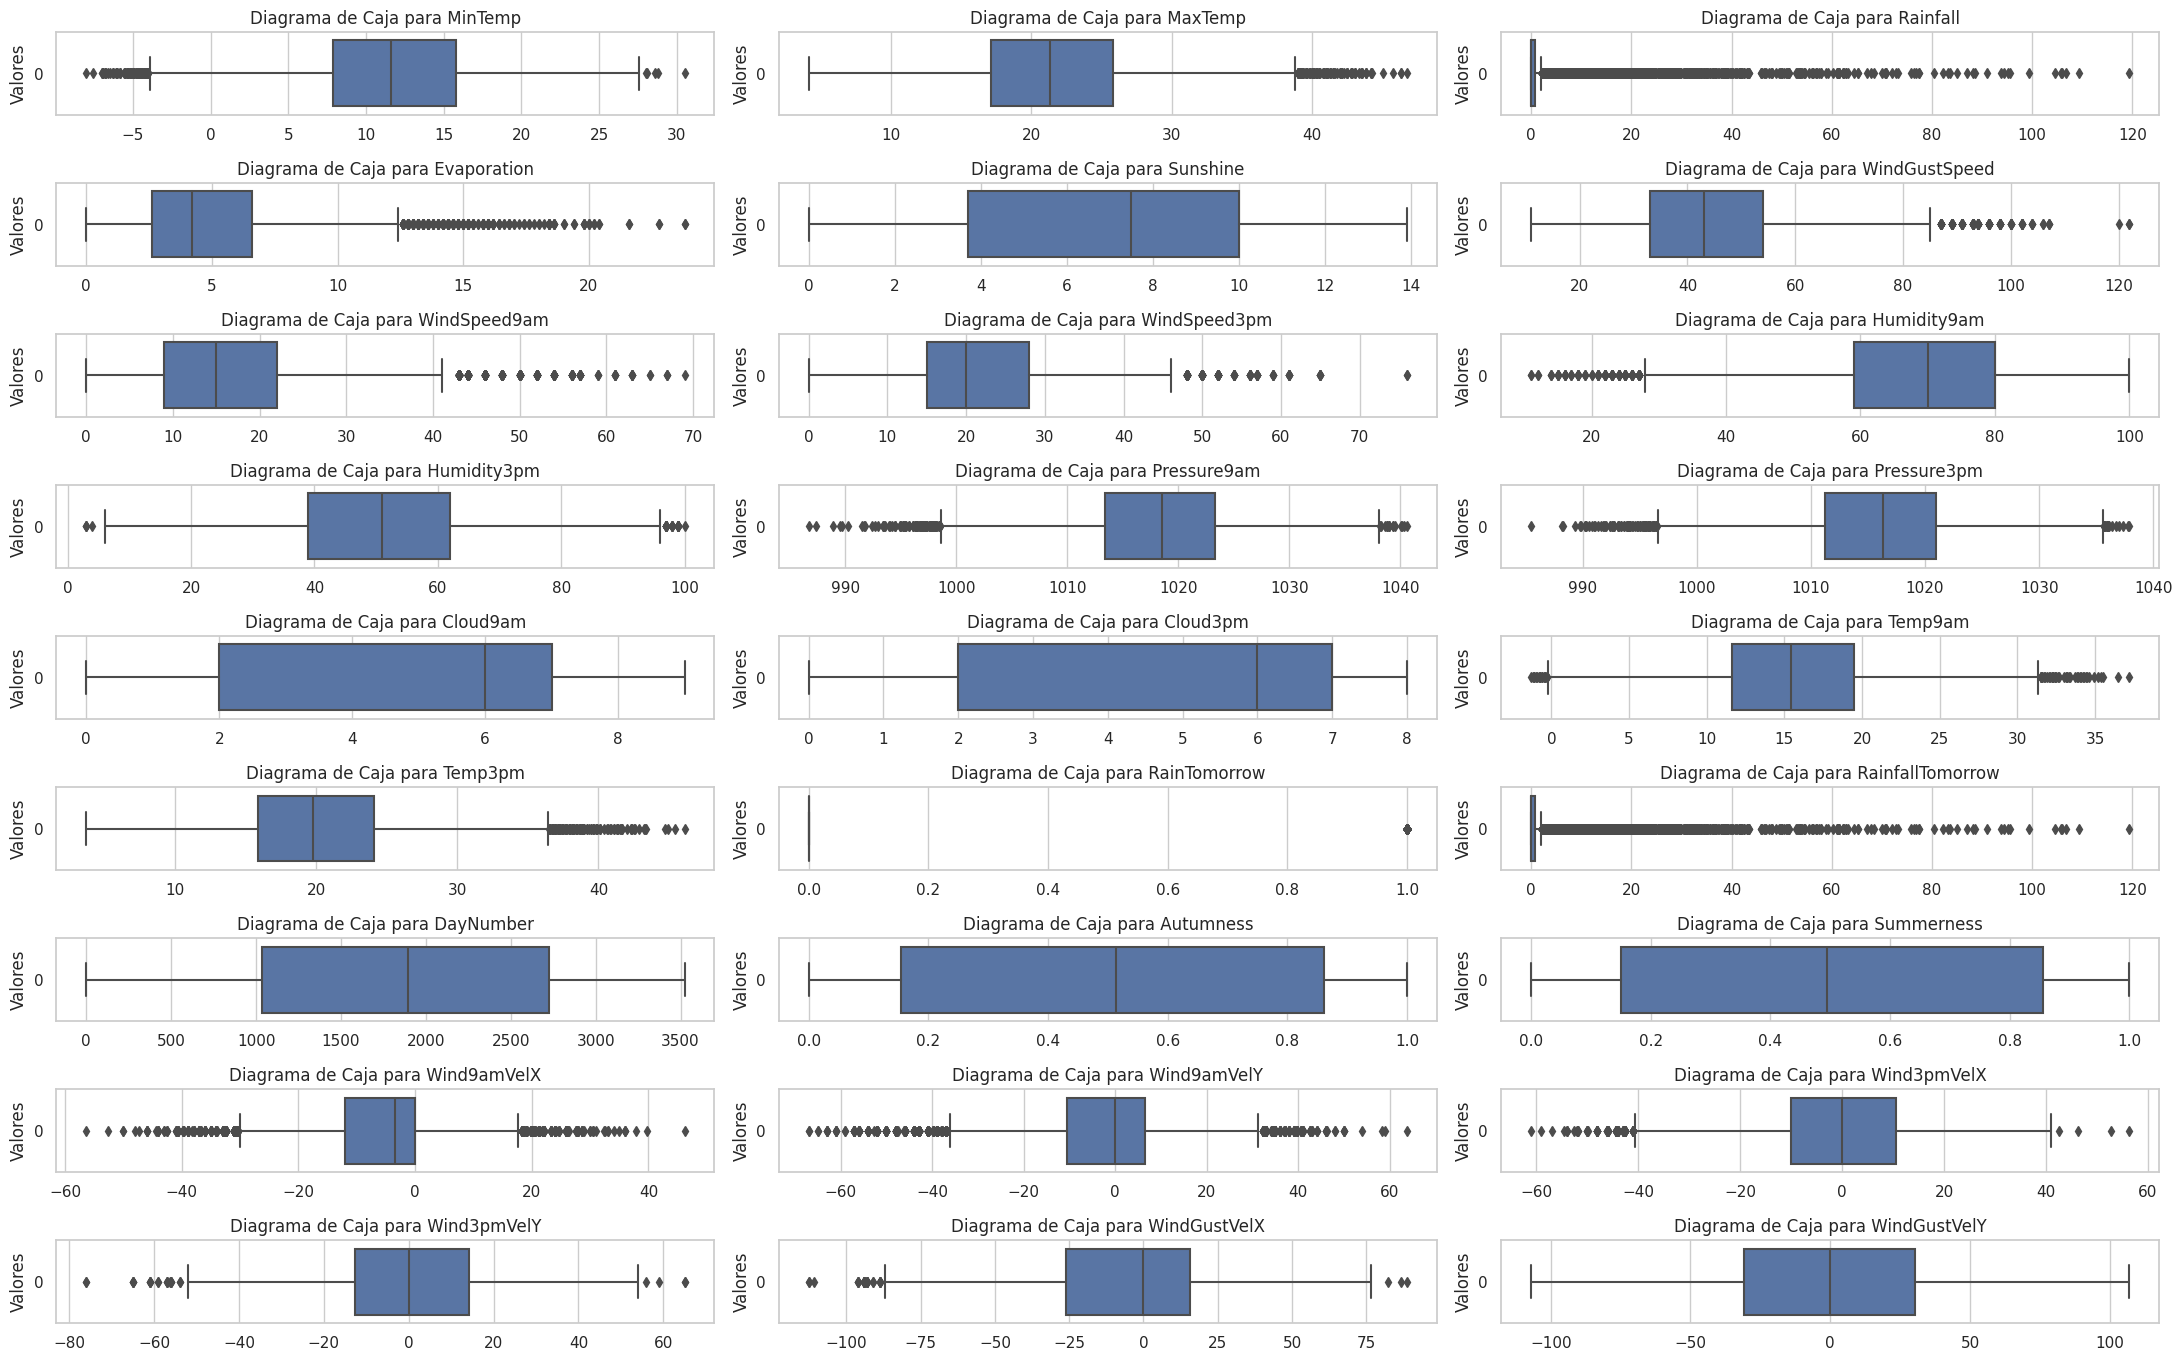

In [ ]:
# Crear una figura grande para todos los gráficos
plt.figure(figsize=(22, 15))

# Filtrar las columnas numéricas
numerical_columns = df.select_dtypes(include=[pd.np.number]).columns

# Definir el número de filas y columnas para los gráficos en un diseño de cuadrícula
num_cols = 3
num_rows = len(numerical_columns) // num_cols + 1

# Crear subgráficos en un diseño de cuadrícula
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(data=df[column], ax=ax, orient='h')  # Establece orientación horizontal
    ax.set_title(column)

# Eliminar subgráficos vacíos si el número de columnas no es múltiplo de 3
for i in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Ajustar el diseño
plt.tight_layout()
plt.show()


###Observacion:
En los gráficos de caja y bigotes de las diferentes features podemos observar que en las variables 'Rainfall' y 'RainfallTomorrow' se observa la mayor cantidad de valores atípicos con respecto a las demás, y ambas están sesgadas a la derecha.

### Selección de características

#### Eliminación de variables categóricas y/o codificadas

In [ ]:
df.drop(columns=['RainToday', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed', 'Date'], inplace = True)

#### Eliminación de variables que no deberían aportar mucha información importante

In [ ]:
#df.drop(columns=['Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'Wind9amVelX', 'Wind9amVelY', 'Wind3pmVelX', 'Wind3pmVelY'], inplace = True)

Da mejores resultados sin eliminar estas características

#### Correlaciones

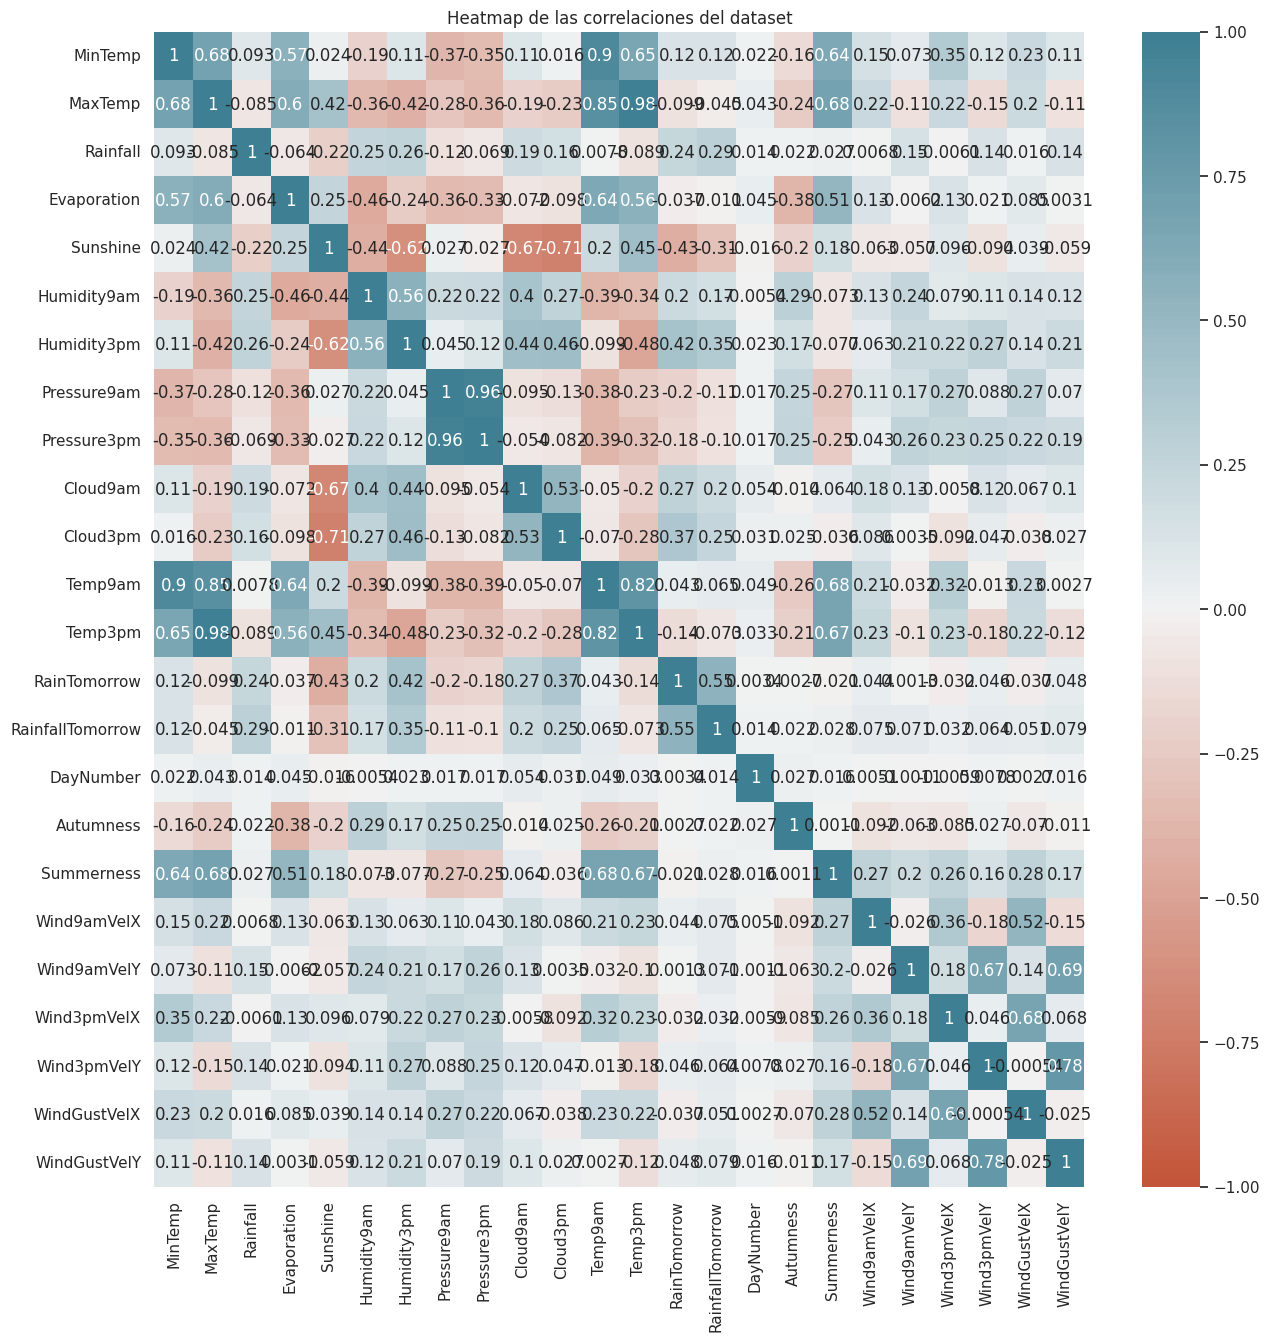

In [ ]:
# Buscar correlación entre las variables:

plt.figure(figsize=(15,15))
df_corr = df.corr()
ax = sns.heatmap(
    df_corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    annot=True
)
plt.title('Heatmap de las correlaciones del dataset')
plt.show()

In [ ]:
#df.drop(columns=["Cloud9am", 'Cloud3pm'], inplace = True)

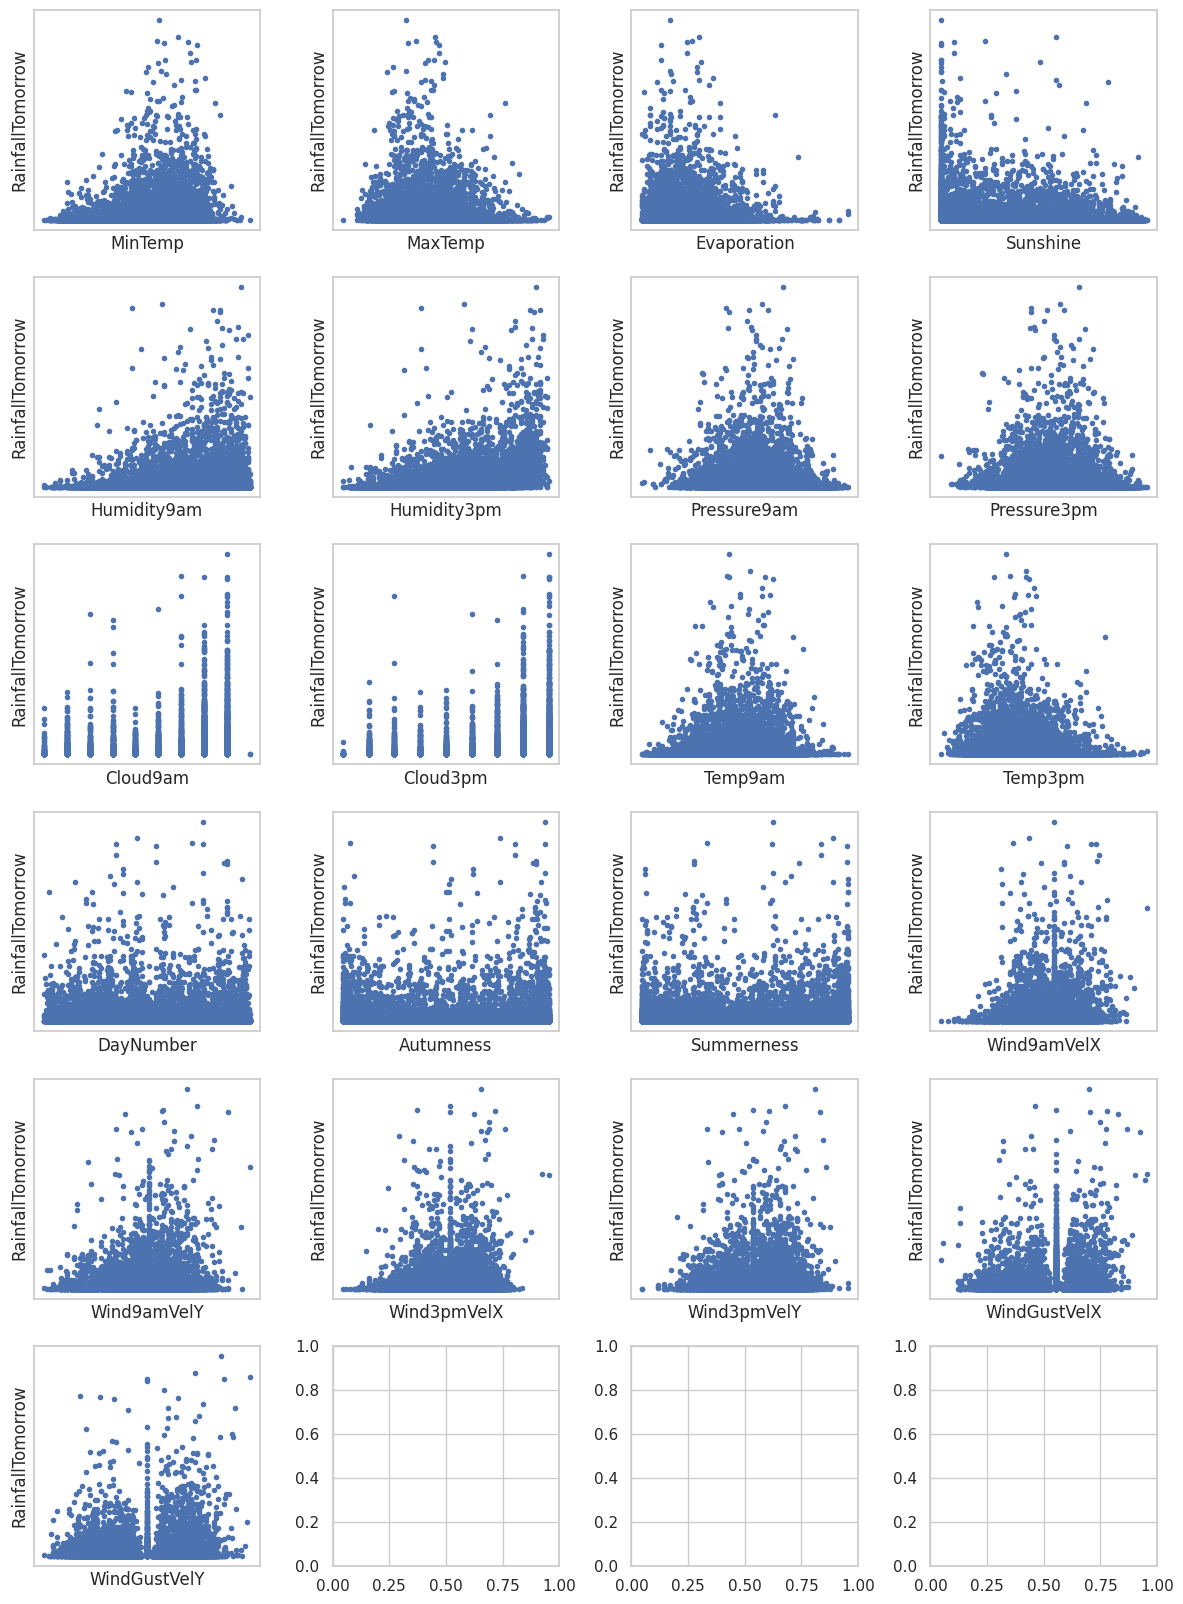

In [ ]:
cols2graph = df.drop(columns=["Rainfall","RainfallTomorrow", "RainTomorrow"]).columns

nplots = len(cols2graph)
ncols = 4
nrows = math.ceil(nplots/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 2.7*nrows))
axes = axes.flatten()

# Create scatterplots or other plots on custom axes
for i in range(nplots):
    col2graph = cols2graph[i]
    axes[i].plot(df[col2graph], 'RainfallTomorrow', 'o', data=df, markersize = 3)

    # Set the x-axis and y-axis labels for each subplot
    axes[i].set_xlabel(col2graph)
    axes[i].set_ylabel('RainfallTomorrow')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Adjust subplot layout
plt.tight_layout()
# Show the plot
plt.show()

### Valores faltantes

In [ ]:
df = df.dropna(subset=['RainfallTomorrow'])
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isna().sum()

MinTemp               10
MaxTemp                6
Rainfall             163
Evaporation         1694
Sunshine            1939
Humidity9am           88
Humidity3pm           45
Pressure9am          253
Pressure3pm          245
Cloud9am            2041
Cloud3pm            2282
Temp9am               24
Temp3pm               16
RainTomorrow           0
RainfallTomorrow       0
DayNumber              0
Autumness              0
Summerness             0
Wind9amVelX          678
Wind9amVelY          678
Wind3pmVelX          289
Wind3pmVelY          289
WindGustVelX        1445
WindGustVelY        1445
dtype: int64

In [ ]:
# Linear interpolation to fill missing values como todos los datos son a lo largo de tiempo
df.interpolate(method='linear', inplace=True)
# Si quedan valores vacíos es por falta de valores extremos que llenamos con la media
df.fillna(df.mean(), inplace =True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,RainfallTomorrow,DayNumber,Autumness,Summerness,Wind9amVelX,Wind9amVelY,Wind3pmVelX,Wind3pmVelY,WindGustVelX,WindGustVelY
0,8.0,24.3,0.0,3.4,6.30,68.0,29.0,1019.7,1015.0,7.0,...,3.6,0,1.146554e-03,0.466159,-4.242641e+00,4.242641e+00,-1.414214e+01,-1.414214e+01,-21.213203,-2.121320e+01
1,14.0,26.9,3.6,4.4,9.70,80.0,36.0,1012.4,1008.4,5.0,...,3.6,1,6.382380e-04,0.474745,4.000000e+00,0.000000e+00,-1.700000e+01,2.081900e-15,36.031302,-1.492465e+01
2,13.7,23.4,3.6,5.8,3.30,82.0,69.0,1009.5,1007.2,8.0,...,39.8,2,2.776915e-04,0.483338,-1.102182e-15,-6.000000e+00,2.296101e+00,-5.543277e+00,-60.104076,-6.010408e+01
3,13.3,15.5,39.8,7.2,9.10,62.0,56.0,1005.5,1007.0,2.0,...,2.8,3,6.502082e-05,0.491937,-2.771639e+01,-1.148050e+01,-2.400000e+01,2.939152e-15,-38.183766,-3.818377e+01
4,7.6,16.1,2.8,5.6,10.60,68.0,49.0,1018.3,1018.5,7.0,...,0.0,4,2.889877e-07,0.500538,7.653669e+00,1.847759e+01,2.586863e+01,1.071514e+01,19.134172,4.619398e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15194,0.1,14.4,0.0,2.1,4.15,68.0,45.0,1017.5,1016.2,4.0,...,0.0,3523,8.346452e-01,0.128500,-3.673940e-15,-2.000000e+01,-1.979899e+01,-1.979899e+01,-33.941125,-3.394113e+01
15195,8.3,12.3,1.4,1.8,5.60,75.0,63.0,1018.7,1017.4,2.0,...,0.0,3523,8.346452e-01,0.128500,-1.016267e+01,-4.209518e+00,1.224647e-16,2.000000e+00,-21.213203,2.121320e+01
15196,5.7,12.6,1.2,1.8,5.60,80.0,50.0,1018.9,1017.5,2.0,...,0.0,3523,8.346452e-01,0.128500,-1.700000e+01,2.081900e-15,-7.000000e+00,8.572528e-16,-23.334524,2.333452e+01
15197,10.1,19.3,0.0,1.4,9.30,56.0,35.0,1017.3,1015.1,5.0,...,0.0,3523,8.346452e-01,0.128500,-1.700000e+01,2.081900e-15,-1.900000e+01,2.326829e-15,-43.000000,5.265981e-15


In [ ]:
df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainTomorrow        0
RainfallTomorrow    0
DayNumber           0
Autumness           0
Summerness          0
Wind9amVelX         0
Wind9amVelY         0
Wind3pmVelX         0
Wind3pmVelY         0
WindGustVelX        0
WindGustVelY        0
dtype: int64

### Escalado de Características: Estandarización

In [ ]:
df_x = df.drop(columns = ['RainTomorrow','RainfallTomorrow'])
x = df_x.values
ylin = df.RainfallTomorrow.values
ylog = df.RainTomorrow.values

In [ ]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

## Regresión Lineal Múltiple

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_s, ylin, test_size=0.2, random_state=42)

In [ ]:
"""
shapes:
    X_train = nxm
    y_train = nx1
    X_test = pxm
    y_test = px1
    W = mx1
"""
n = X_train.shape[0]
m = X_train.shape[1]
p = X_test.shape[0]

### LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Gráfico de Predicción vs Target

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
for i in range(len(df_x.columns)):
    print(df_x.columns[i], "\t", lr.coef_[i])

MinTemp 	 -0.3138796146292974
MaxTemp 	 1.0207469241973328
Rainfall 	 1.5053163734597717
Evaporation 	 0.25583250271931957
Sunshine 	 -1.126256356757142
Humidity9am 	 -0.6111247109067167
Humidity3pm 	 2.6376767633545475
Pressure9am 	 2.158499962262587
Pressure3pm 	 -2.761808033628664
Cloud9am 	 -0.3055112835339877
Cloud3pm 	 0.1918682303743815
Temp9am 	 -0.18428007655440315
Temp3pm 	 0.37606172385389797
DayNumber 	 -0.04556685194925262
Autumness 	 0.10897871109681455
Summerness 	 -0.44241919053349726
Wind9amVelX 	 0.22910100089938149
Wind9amVelY 	 0.25096648084863266
Wind3pmVelX 	 -0.48434855432152335
Wind3pmVelY 	 -0.19203223303335504
WindGustVelX 	 0.24645030348974323
WindGustVelY 	 0.5701550541170775


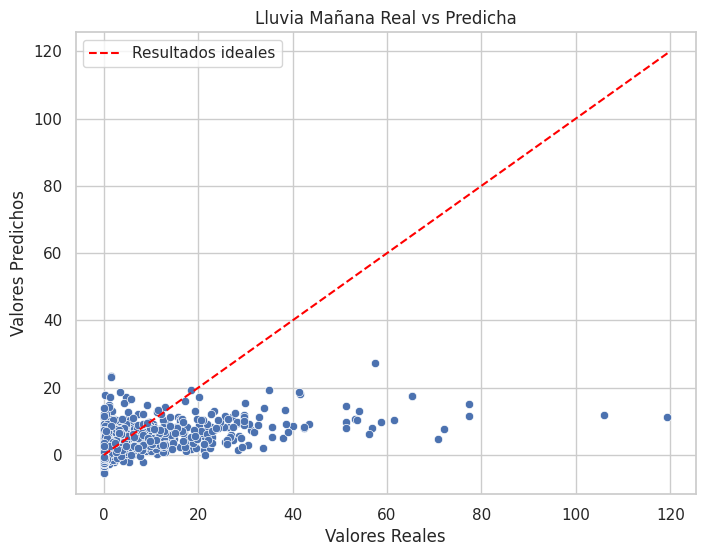

In [ ]:
# Create a scatter plot to compare the actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Lluvia Mañana Real vs Predicha")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")

# Plot a 45-degree diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Resultados ideales')
plt.legend()

plt.show()

#### R2

##### Sobre el training

In [ ]:
r2 = r2_score(y_train, lr.predict(X_train))
print("R2", r2)

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - m - 1))
print("R2 ajustado:", adjusted_r2)

R2 0.20823205801654632


Hay underfitting

##### Sobre el test

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2", r2)

adjusted_r2 = 1 - ((1 - r2) * (p - 1) / (p - m - 1))
print("R2 ajustado:", adjusted_r2)

R2 0.23249712717147886


Puntos a intentar para subir R2:
- Analizar Outliers
- Quedarse con Location
- Separar por Location antes de interpolar
- Llenar las fechas antes de interpolar
- Interpolar el viento antes de codificarlo
- Dropear características que le falten datos en vez de llenarlas
- Dropear características que en retrospectiva no parecen importantes?

Razones por las cuales no se podría hacer mucho:
- Falta de datos
- Modelo demasiado simple (lineal)
- Falta de características que permitan predecir la lluvia

### Gradiente Descendiente

In [ ]:
# Poner columna de unos a las matrices X
X_train_1s = np.hstack((np.ones((n, 1)), X_train))
X_test_1s = np.hstack((np.ones((p, 1)), X_test))

# Inicializar pesos aleatorios
W = np.random.randn(m+1).reshape(m+1, 1)

train_errors = []  # Para almacenar el error de entrenamiento en cada época
test_errors = []   # Para almacenar el error de prueba en cada época

epochs = 1000
learn_rate = 0.01
for i in range(epochs):
    #TEST
    # Calcular predicción y error de prueba
    y_pred = np.matmul(X_test_1s, W)
    error_test = y_test.reshape(-1,1) - y_pred
    test_mse = np.mean(error_test ** 2)
    test_errors.append(test_mse)

    #TRAINING
    # Calcular predicción y error de entrenamiento
    y_pred_train = np.matmul(X_train_1s, W)
    error_train = y_train.reshape(-1,1) - y_pred_train
    train_mse = np.mean(error_train ** 2)
    train_errors.append(train_mse)

    # Calcular el gradiente y actualizar pesos
    grad_sum = np.sum(error_train * X_train_1s, axis=0)
    grad_mul = -2/n * grad_sum  # 1xm
    gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

    W = W - (learn_rate * gradient)

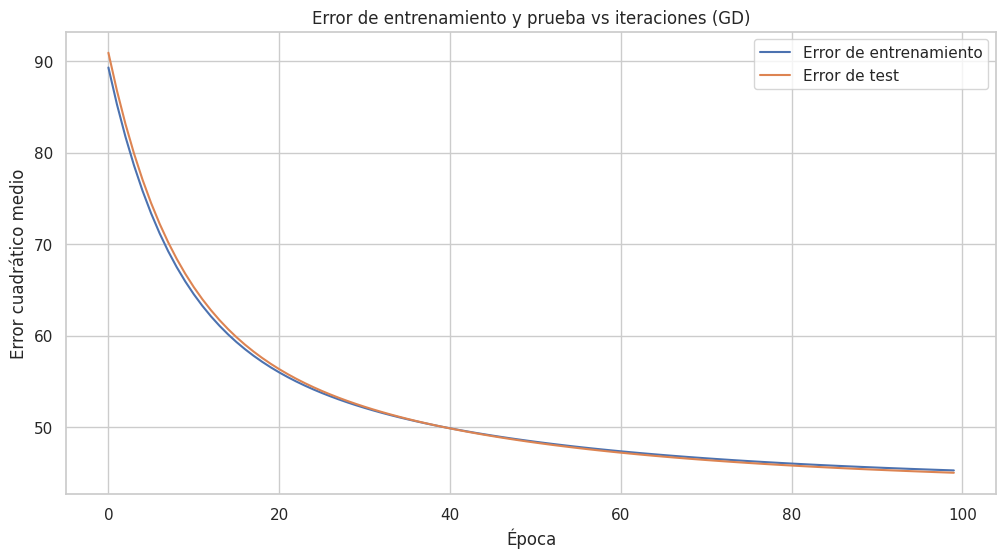

In [ ]:
# Graficar errores de entrenamiento y prueba
# Definir una figura
plt.figure(figsize=(12, 6))
# Plotear errores de entrenamiento
plt.plot(train_errors, label='Error de entrenamiento')
# Plotear errores de prueba
plt.plot(test_errors, label='Error de test')
# Poner labels en los ejes
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
# Activar la leyenda
plt.legend()
# Poner titulo
plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
# Terminar y mostrar gráfico
plt.show()

#### R2

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2", r2)

adjusted_r2 = 1 - ((1 - r2) * (p - 1) / (p - m - 1))
print("R2 ajustado:", adjusted_r2)

### Regularizaciones

#### Lasso

In [ ]:
# Creación del modelo Lasso con validación cruzada para encontrar el valor óptimo de alpha
lasso_model = LassoCV(alphas=np.logspace(-10, 10, 200), cv=10)
lasso_model.fit(X_train, y_train)

# Predicciones con el modelo Lasso
y_pred = lasso_model.predict(X_test)

In [ ]:
print("Mejor Alfa:", lasso_model.alpha_)

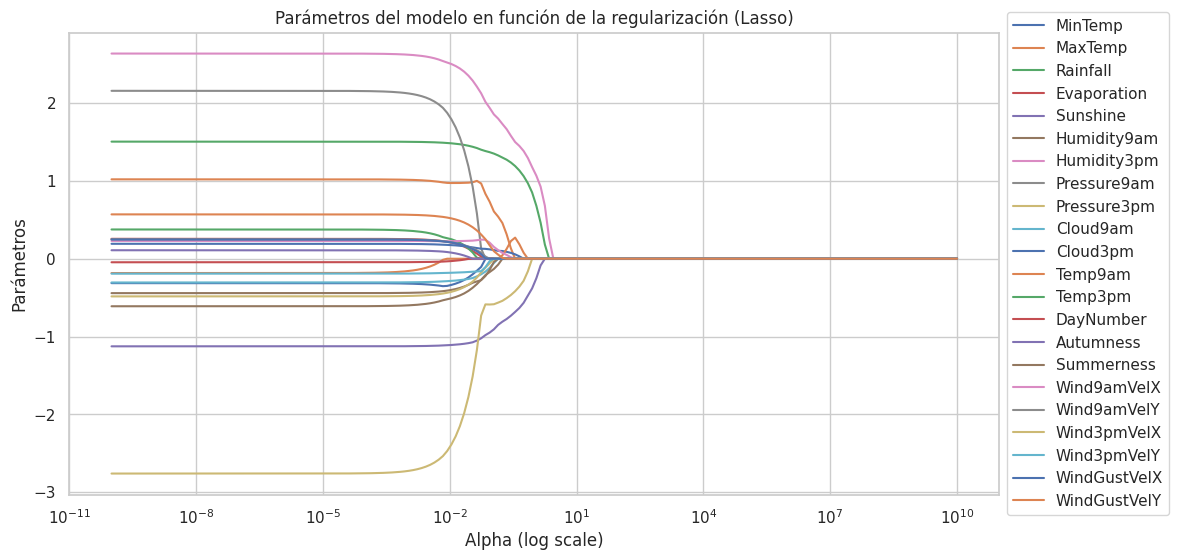

In [ ]:
# Asumiendo que X_train es un numpy array sin nombres de columna
X_train = pd.DataFrame(X_train)  # Convertir a DataFrame de pandas

# Asignar nombres a las columnas
X_train.columns = ['MinTemp', 'MaxTemp', 'Rainfall' ,'Evaporation' ,'Sunshine', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm',
                    'DayNumber','Autumness', 'Summerness', 'Wind9amVelX', 'Wind9amVelY', 'Wind3pmVelX', 'Wind3pmVelY',
                    'WindGustVelX', 'WindGustVelY']

# Definir una serie de valores de alpha
alphas = np.logspace(-10, 10, 200)

# Inicializar una lista para almacenar los coeficientes del modelo
coefs = []

# Ajustar el modelo Lasso para diferentes valores de alpha y registrar los coeficientes
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefs.append(lasso_model.coef_)

# Convertir la lista de coeficientes en un arreglo numpy
coefs = np.array(coefs)

# Obtener los nombres de las columnas desde el DataFrame X_train
column_names = X_train.columns

# Graficar la evolución de los coeficientes en función de alpha con nombres de columna
plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=column_names[i])

plt.xscale('log')
plt.title('Parámetros del modelo en función de la regularización (Lasso)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parámetros')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Colocar la leyenda fuera del gráfico
plt.axis('tight')
plt.show()

##### R2

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2", r2)

adjusted_r2 = 1 - ((1 - r2) * (p - 1) / (p - m - 1))
print("R2 ajustado:", adjusted_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


#### Ridge

In [ ]:
# Creación del modelo Ridge con validación cruzada para encontrar el valor óptimo de alpha
ridge_model = RidgeCV(alphas=np.logspace(-10, 10, 200), cv=10)
ridge_model.fit(X_train, y_train)

# Predicciones con el modelo Ridge
y_pred = ridge_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [ ]:
print("Mejor Alfa:", ridge_model.alpha_)

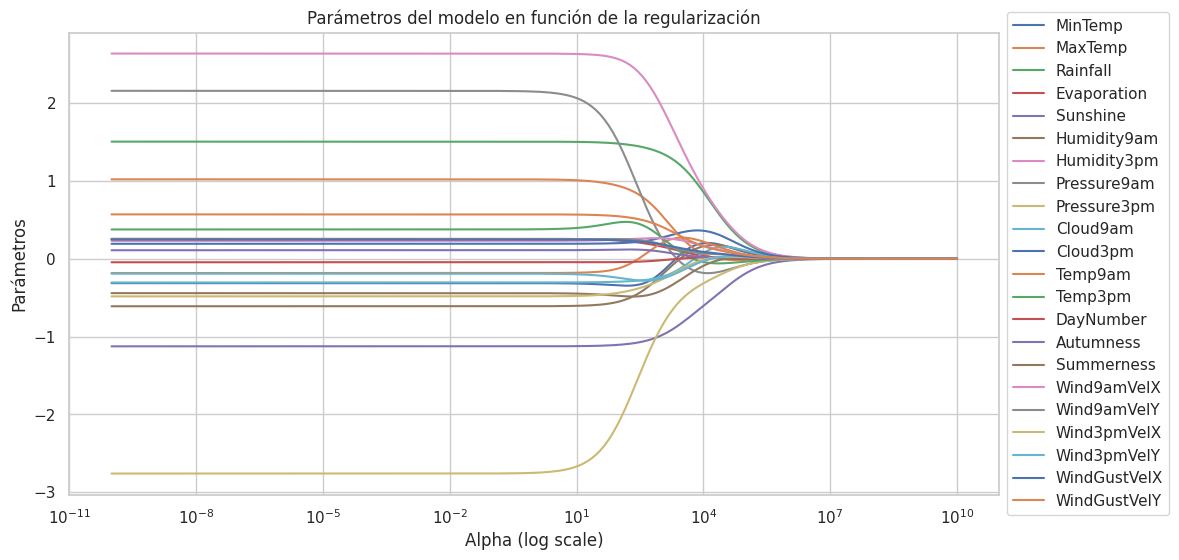

In [ ]:
# Asumiendo que X_train es un numpy array sin nombres de columna
X_train = pd.DataFrame(X_train)  # Convertir a DataFrame de pandas

# Asignar nombres a las columnas
X_train.columns = ['MinTemp', 'MaxTemp', 'Rainfall' ,'Evaporation' ,'Sunshine', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 	'Cloud3pm','Temp9am', 'Temp3pm',
                    'DayNumber','Autumness', 'Summerness', 'Wind9amVelX', 'Wind9amVelY', 'Wind3pmVelX', 'Wind3pmVelY',
                    'WindGustVelX', 'WindGustVelY']

# Definir una serie de valores de alpha
alphas = np.logspace(-10, 10, 200)

# Inicializar una lista para almacenar los coeficientes del modelo
coefs = []

# Ajustar el modelo Ridge para diferentes valores de alpha y registrar los coeficientes
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

# Convertir la lista de coeficientes en un arreglo numpy
coefs = np.array(coefs)

# Obtener los nombres de las columnas desde el DataFrame X_train
column_names = X_train.columns

# Graficar la evolución de los coeficientes en función de alpha con nombres de columna
plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=column_names[i])

plt.xscale('log')
plt.title('Parámetros del modelo en función de la regularización')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parámetros')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Colocar la leyenda fuera del gráfico
plt.axis('tight')
plt.show()

##### R2

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2", r2)

adjusted_r2 = 1 - ((1 - r2) * (p - 1) / (p - m - 1))
print("R2 ajustado:", adjusted_r2)

Mejor alfa:  28.66067616948256
MSE:  42.53567635379745
R2: 0.23


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


#### Elasticnet

In [ ]:
modelo = ElasticNetCV(l1_ratio = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99], alphas = np.logspace(-10, 10, 200), cv = 10)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229749.2873750465, tolerance: 58.90061167412955
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_

In [ ]:
print("Mejor L1 Ratio:", modelo.l1_ratio_)
print("Mejor Alfa:", modelo.alpha_)

##### Gráfico de Predicción vs Target

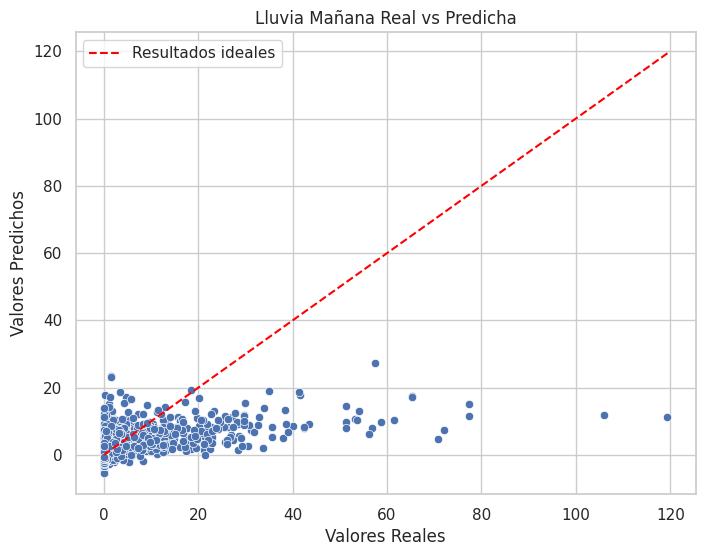

In [ ]:
# Create a scatter plot to compare the actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Lluvia Mañana Real vs Predicha")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")

# Plot a 45-degree diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Resultados ideales')
plt.legend()

plt.show()

##### R2

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2", r2)

adjusted_r2 = 1 - ((1 - r2) * (p - 1) / (p - m - 1))
print("R2 ajustado:", adjusted_r2)

Mejor alfa:  0.0017225859653987874
Mejor L1 ratio:  0.0
R2: 0.23


En un primer momento sin regularización tampoco está teniendo buenos resultados en el conjunto de training, así que hay un problema de underfitting y va a preferir no regularizar nada

## Regresión Logística

4) Implementar la solución del problema de clasificación con regresión logística.
Obtener las métricas adecuadas (entre Accuracy, precision, recall, F1 Score, ROC-AUC, entre otras).


### LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_s, ylog, test_size=0.2, random_state=42)

In [ ]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

### Curva ROC

In [ ]:
# Obtengo las probabilidades de predicción del modelo
y_probs = model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

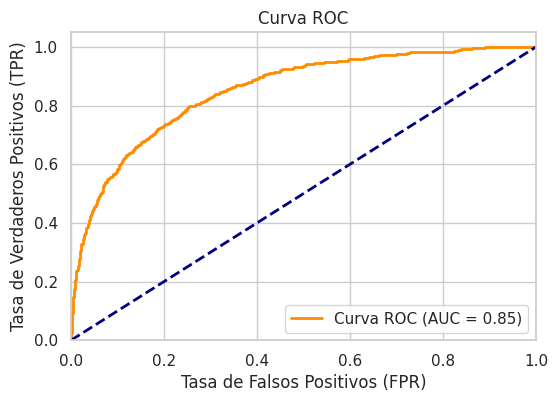

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### F1-Score

In [ ]:
print("Resultados con regresión logística\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2336
         1.0       0.72      0.48      0.57       704

    accuracy                           0.84      3040
   macro avg       0.79      0.71      0.74      3040
weighted avg       0.82      0.84      0.82      3040

[[2204  132]
 [ 369  335]]


Elegimos la metrica 'f1-score' para comparar el modelo antes y despues de balancearlo.
Elegimos usar la fila 2 que es la que mas deberiamos ajustar. (1.0)

### Balanceo del dataset

#### Adentro de LogisticRegression

In [ ]:
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      2336
         1.0       0.51      0.75      0.61       704

    accuracy                           0.78      3040
   macro avg       0.71      0.77      0.73      3040
weighted avg       0.82      0.78      0.79      3040

[[1832  504]
 [ 173  531]]


Podemos observar que ajusto el f1-score, de 0.57 a 0.61.

#### Con Over Sampling

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])

(9307, 9307)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

         0.0       0.91      0.79      0.84      2336
         1.0       0.51      0.75      0.61       704

    accuracy                           0.78      3040
   macro avg       0.71      0.77      0.73      3040
weighted avg       0.82      0.78      0.79      3040

[[1836  500]
 [ 179  525]]


#### Con Under Sampling

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled2, y_resampled2 = undersampler.fit_resample(X_train, y_train)

In [ ]:
len(y_resampled2[y_resampled2==1]), len(y_resampled2[y_resampled2==0])

(2852, 2852)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo con los datos submuestreados
model.fit(X_resampled2, y_resampled2)
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Resultados regresión logística con RandomUnderSampler:\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Resultados regresión logística con RandomUnderSampler:

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      2336
         1.0       0.51      0.75      0.61       704

    accuracy                           0.78      3040
   macro avg       0.71      0.77      0.73      3040
weighted avg       0.82      0.78      0.79      3040

[[1832  504]
 [ 173  531]]
